In [118]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle 

In [119]:
df=pd.read_csv("diamonds.csv")

In [120]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [121]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [122]:
lb=LabelEncoder()

In [123]:
df["cut_encode"]=lb.fit_transform(df["cut"])
df["color_encode"]=lb.fit_transform(df["color"])
df["clarity_encode"]=lb.fit_transform(df["clarity"])

In [175]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<Axes: >

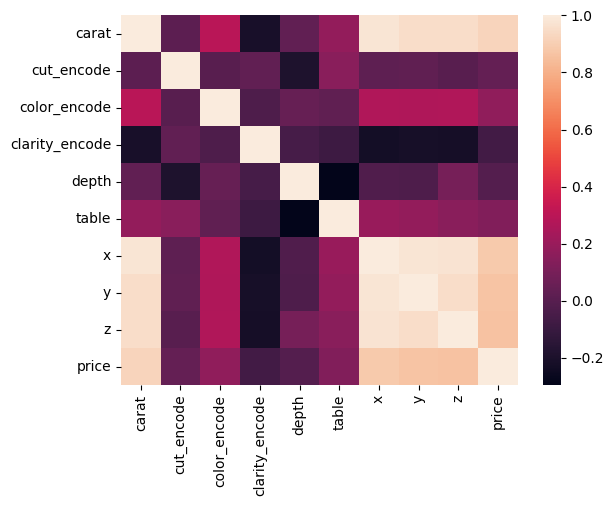

In [124]:
sns.heatmap(df[["carat","cut_encode","color_encode","clarity_encode","depth","table","x","y","z","price"]].corr(),fmt="2f")

In [125]:
scaler=StandardScaler()

In [126]:
df["carat_linear"]=df["carat"]**(-1)

In [127]:
df["x_linear"]=df["x"]**(-1)

In [128]:
df["y_linear"]=df["y"]**(-2)

In [129]:
df["z_linear"]=df["z"]**(-1)

<Axes: >

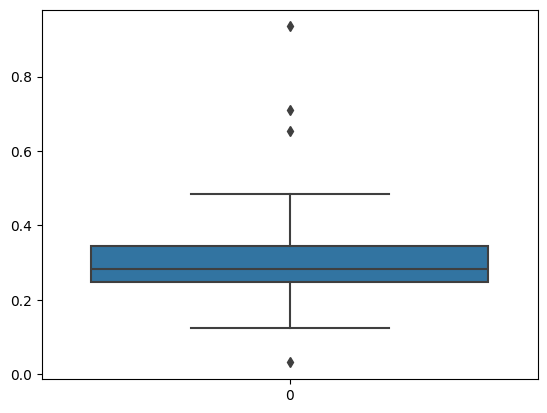

In [130]:
sns.boxplot(df["z"]**(-1))

In [141]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encode,color_encode,clarity_encode,carat_linear,x_linear,y_linear,z_linear
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3,4.347826,0.253165,0.063130,0.411523
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2,4.761905,0.257069,0.067817,0.432900
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4,4.347826,0.246914,0.060369,0.432900
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5,3.448276,0.238095,0.055888,0.380228
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3,3.225806,0.230415,0.052847,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2,1.388889,0.173913,0.030141,0.285714
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2,1.388889,0.175747,0.030246,0.277008
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2,1.428571,0.176678,0.030996,0.280899
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3,1.162791,0.162602,0.026699,0.267380


In [221]:
x=df[["carat","cut_encode","color_encode","clarity_encode","x","y","z"]]
y=df["price"]

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [223]:
lr=LinearRegression()

In [224]:
lr.fit(x_train,y_train)

LinearRegression()

In [225]:
lr.score(x_train,y_train)

0.8836960008209643

In [226]:
lr.score(x_test,y_test)

0.8747824290150951

In [137]:
rb=RandomForestRegressor()

In [166]:
rb.fit(x_train,y_train)

RandomForestRegressor()

In [167]:
rb.score(x_train,y_train)

0.9870385722906115

In [168]:
rb.score(x_test,y_test)

0.91168540452522

In [213]:
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [214]:
# Load the model from the file
with open('model.pkl', 'rb') as model_file:
    mlmodel = pickle.load(model_file)

In [186]:
df.to_json("new.json")

In [197]:
df["cut_encode"][df["cut"]=="Ideal"].values

array([2, 2, 2, ..., 2, 2, 2])

In [198]:
df["cut_encode"][df["cut"]=="Ideal"].values[0]

2

In [195]:
df["color_encode"][df['color']=="E"].values[0]

1

In [220]:
df["z"].unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,